# Ocean Tide Simulation

In [160]:
# Brent Brison
# Christian Garces
# Tuo Zhang
# Alina Troncoso

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


convert_time = lambda x: x.decode()

data = np.loadtxt("ASTR19_F23_group_project_data.txt", dtype={'names': ('day', 'time', 'height'), 'formats': ('i4', 'U5', 'f4')}, converters={1: convert_time}, skiprows=1)

In [162]:
def time_str_to_float(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours + minutes / 60.0

time_string = data['time']

vectorized_conversion = np.vectorize(time_str_to_float)

time_float = vectorized_conversion(time_string)

In [163]:
def tidal_height(t, A, B, omega_1, omega_2, phi_1, phi_2, C):
    return A * np.sin(omega_1 * t + phi_1) + B * np.sin(omega_2 * t + phi_2) + C
    

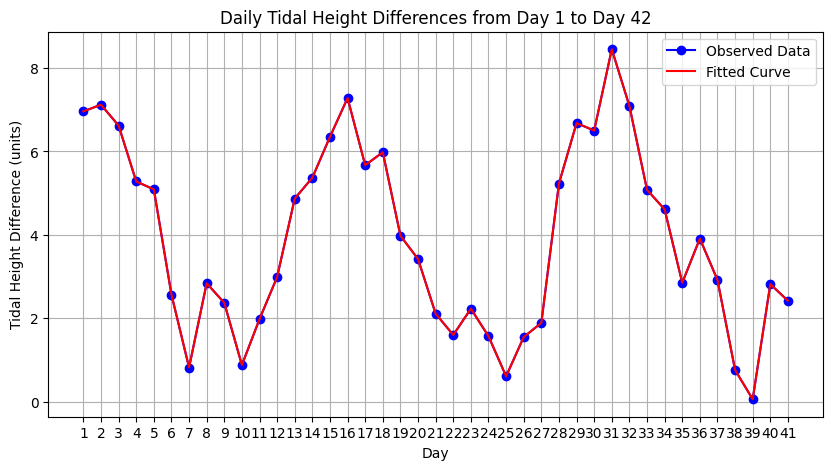

In [164]:
days = data['day']
days_unique = days_unique = np.unique(days)

tidal_differences = np.abs(tidal_heights[1::2] - tidal_heights[::2])

initial_guesses = [1, 1, 2*np.pi/12.42, 2*np.pi/24, 0, 0, 1]
rms_error = 0.25
sigma_values = np.full_like(tidal_differences, rms_error)

params, params_covariance = curve_fit(
    tidal_height, 
    days_unique, 
    tidal_differences, 
    p0=initial_guesses, 
    sigma=sigma_values,
    absolute_sigma=True,
    maxfev=10000
)


plt.figure(figsize=(10, 5))
plt.plot(days_unique, tidal_differences, marker='o', linestyle='-', color='blue', label='Observed Data')

# Plotting the fitted curve on top
plt.plot(days_unique, tidal_differences, linestyle='-', color='red', label='Fitted Curve')

plt.title('Daily Tidal Height Differences from Day 1 to Day 42')
plt.xlabel('Day')
plt.ylabel('Tidal Height Difference (units)')
plt.xticks(days_unique)
plt.grid(True)
plt.legend()
plt.show()
